## Initialize

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-03-06 14:37:40,263 | INFO     |: info
2024-03-06 14:37:40,268 | WARNING  |: warning
2024-03-06 14:37:40,269 | ERROR    |: error
2024-03-06 14:37:40,269 | CRITICAL |: critical


In [3]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-06 14:37:40,794 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-03-06 14:37:45,522 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\ble_robot-1.1\ble_python\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


## Task 1

In [4]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says -> HiHello :)


## Task 2

In [5]:
ble.send_command(CMD.GET_TIME_MILLIS, "")
output2 = ble.receive_string(ble.uuid['RX_STRING'])
print(output2)

T: 16282.0


## Task 3

In [6]:
arr_time=[] #store the time data in milliseconds
raw_message=[] #store raw message received
# A callback function that only works for 
#receiving time info from GET_TIME_MILLIS
def notification_handler(uuid, byte_array):
    global arr_time, raw_message
    raw_message.append(byte_array)
    # Extracts the time portion in seconds from the byte array
    message = ble.bytearray_to_string(byte_array)
    label, value = message.split(':')
    time_ms = float(value)
    arr_time.append(time_ms)
    print(f"Time = {time_ms/1000}s")

In [10]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.GET_TIME_MILLIS, "")
ble.send_command(CMD.GET_TIME_MILLIS, "")
ble.send_command(CMD.GET_TIME_MILLIS, "")

Time = 2948.854s
Time = 2948.975s
Time = 2949.098s


In [11]:
ble.stop_notify(ble.uuid['RX_STRING'])
arr_time # in ms

[2948854.0, 2948975.0, 2949098.0]

2024-03-06 07:23:53,420 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


## Task 4

In [8]:
raw_message=[]
arr_time = [] 
ble.start_notify(ble.uuid['RX_STRING'], notification_handler) 
ble.send_command(CMD.GET_TIME, 10)
time.sleep(2)
ble.stop_notify(ble.uuid['RX_STRING'])

Time = 46.097s
Time = 46.099s
Time = 46.101s
Time = 46.106s
Time = 46.16s
Time = 46.161s
Time = 46.219s
Time = 46.22s
Time = 46.225s
Time = 46.28s
Time = 0.184s


In [13]:
#Size of command and message in bytes
message_size = len(raw_message[0]) # size of message received in bytes
total_data_transferred = (len(arr_time)-1)*message_size
total_time_ms = arr_time[-1]

# Calculate the effective data transfer rate in bytes per millisecond
transfer_rate = total_data_transferred / total_time_ms
print(f"Effective data transferred is about {np.round(transfer_rate, 3)} bytes/ms")

Effective data transferred is about 0.489 bytes/ms
2024-03-06 07:56:08,333 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


## Task 5

In [7]:
arr_time=[] 
raw_message=[] 
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_TIME_DATA, "")

Time = 56.276s
Time = 56.277s
Time = 56.277s
Time = 56.277s
Time = 56.277s
Time = 56.278s
Time = 56.278s
Time = 56.278s
Time = 56.278s
Time = 56.279s
Time = 56.279s
Time = 56.279s
Time = 56.28s
Time = 56.28s
Time = 56.28s
Time = 56.282s
Time = 56.282s
Time = 56.282s
Time = 56.283s
Time = 56.283s


In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

## Task 6

In [9]:
raw_message=[]
#add more arrays if needed
temperature = []
arr_time = [] 
num=[]
def notification_handler2(uuid, byte_array):
    global arr_time, raw_message
    raw_message.append(byte_array)
    # Extracts the time portion in seconds from the byte array
    message = ble.bytearray_to_string(byte_array)
    readings = message.split('|')
    num.clear()
    for reading in readings:
        label, value = reading.split(':')
        num.append(value)
    #Add more arrays if needed
    arr_time.append(float(num[0])/1000)
    temperature.append(num[1])
    if not temperature[-1]==' ':
        print(f"Time in seconds: {float(num[0])/1000}; Temerature: {num[1]}C")

ble.start_notify(ble.uuid['RX_STRING'], notification_handler2)
ble.send_command(CMD.GET_TEMP_READINGS, "")
time.sleep(5)
ble.stop_notify(ble.uuid['RX_STRING'])

Time in seconds: 998.164; Temerature: 22.828C
Time in seconds: 998.165; Temerature: 23.412C
Time in seconds: 998.165; Temerature: 23.412C
Time in seconds: 998.165; Temerature: 22.828C
Time in seconds: 998.171; Temerature: 23.412C
Time in seconds: 998.171; Temerature: 23.412C
Time in seconds: 998.171; Temerature: 23.412C
Time in seconds: 998.171; Temerature: 23.412C
Time in seconds: 998.172; Temerature: 23.412C
Time in seconds: 998.172; Temerature: 23.412C
Time in seconds: 998.172; Temerature: 22.828C
Time in seconds: 998.172; Temerature: 23.412C
Time in seconds: 998.173; Temerature: 22.828C
Time in seconds: 998.173; Temerature: 22.828C
Time in seconds: 998.173; Temerature: 23.412C
Time in seconds: 998.173; Temerature: 23.412C
Time in seconds: 998.173; Temerature: 23.412C
Time in seconds: 998.174; Temerature: 22.828C
Time in seconds: 998.174; Temerature: 22.828C
Time in seconds: 998.174; Temerature: 22.828C


## Task 7

In [10]:
message_size = len(raw_message[0]) # size of one message received in bytes
total_data_transferred = message_size*(len(raw_message)-1)
total_time_ms = arr_time[-1]*1000
# Calculate the effective data transfer rate in bytes per millisecond
transfer_rate = total_data_transferred / total_time_ms
print(f"Effective data transferred is about {np.round(transfer_rate, 3)} bytes/ms")

Effective data transferred is about 1.041 bytes/ms


In [29]:
#The time is stored as an array of double with size of 8 bytes and 
#temperature is stored as an array of float with size of 4 bytes, so for each pair of data is 12 bytes
#Additionally, in order to send a string like 'T:294649.0|C:23.412', we need extra 19 bytes to store it in tx_estring_value
(384000-19)/12

31998.416666666668

2024-02-14 20:19:00,037 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


## Effective Data Rate And Overhead

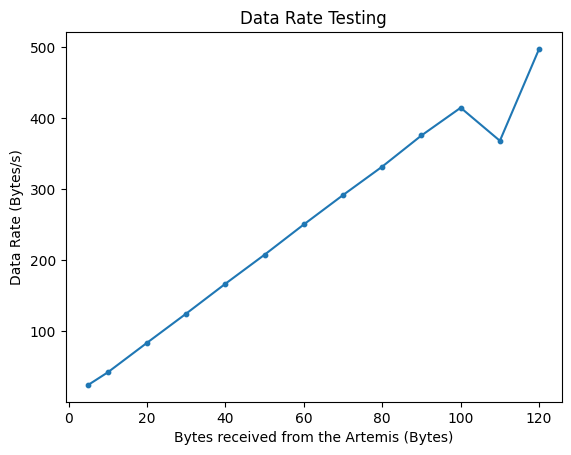

In [7]:
message=[]
BytesSize = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
DataRate =[]

for i in BytesSize:
    start = time.time()
    ble.send_command(CMD.CALC_DATA_RATE, i)
    message.append(ble.receive_string(ble.uuid['RX_STRING']))
    end = time.time()
    DataRate.append(i / (end - start))

#Plot
plt.plot(BytesSize, DataRate)
plt.scatter(BytesSize, DataRate,s=10)
plt.title('Data Rate Testing')
plt.xlabel('Bytes received from the Artemis (Bytes)')
plt.ylabel('Data Rate (Bytes/s)');

## Reliability

In [7]:
message=[]
BytesSize = [130,140,150]
print(f"Asking the board to send strings containing {BytesSize[0]}, {BytesSize[1]}, and {BytesSize[2]} 'A's with no delay")
for i in BytesSize:
    ble.send_command(CMD.CALC_DATA_RATE, i)
    message.append(ble.receive_string(ble.uuid['RX_STRING']))
print(f"Received strings that contain {len(message[0])}, {len(message[1])}, and {len(message[2])} 'A's")

Asking the board to send strings containing 130, 140, and 150 'A's with no delay
Received strings that contain 130, 140, and 150 'A's
2024-03-06 15:23:53,313 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


In [11]:
# Disconnect
ble.disconnect()

2024-02-14 15:37:24,516 | INFO     |: Disconnected from C0:89:C1:6D:24:4B
